#### COMPANION WORKBOOK

# Exploratory Analysis Plus

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Prep Work

First, let's import libraries and load the dataset. In general, it's good practice to keep all of your library imports at the top of your notebook or program.

#### Starting from this project, we'll have YOU identify which libraries to import. Import the libraries you think you'll need.
* Up to now, we've taken care of this for you so you could focus on the actual machine learning.
* However, getting familiar with importing libraries is actually pretty important.
* **Tip:** If you forget one, you can always add it here later and re-run this code block.
* Check the answer key if needed (or better yet, review the previous project).
* We've provided comments for guidance.

In [2]:
# NumPy for numerical computing
import numpy as np


# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline


# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')


# (Optional) Suppress FutureWarning


#### Next, read in the dataset.
* The file name is <code style="color:crimson">'employee_data.csv'</code>

In [3]:
df = pd.read_csv('employee_data.csv')

In [6]:
df.shape

(14249, 10)

In [4]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [5]:
# numerical data summary
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [14]:
# categorical data summary
df.select_dtypes(include=['object'])

,department,salary,status
0,engineering,low,Left
1,support,low,Employed
2,sales,medium,Employed
3,sales,low,Employed
4,sales,low,Employed
...,...,...,...
14244,IT,low,Employed
14245,sales,low,Employed
14246,finance,medium,Left
14247,IT,medium,Employed


In [13]:
print(df.department.unique())
print(len(df.department.unique()))

['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'temp'
 'procurement' 'finance' nan 'management' 'information_technology' 'admin']
13


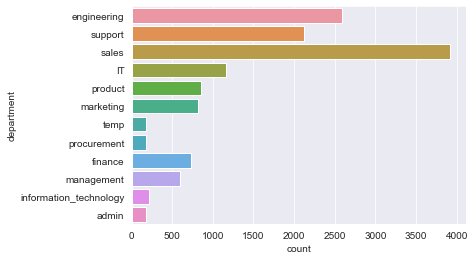

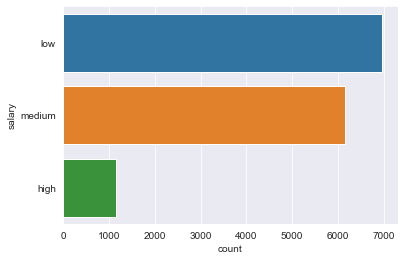

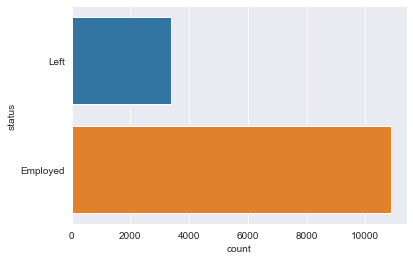

In [15]:
for cat in df.select_dtypes(include=['object']):
    sns.countplot(y=cat, data=df)
    plt.show()

#### Important Note: You're now in the driver's seat!

For this project, we're going to leave the standard exploratory analysis steps to you. But don't worry, we've provided a **guided exercise** for each of the major steps, including the questions you should be answering for yourself. It's imperative that you finish those exercises, and you can find them below.

## II. Advanced Segmentations

#### For this dataset, the target variable is categorical (status). We can use violin plots to plot categorical data against numeric features.

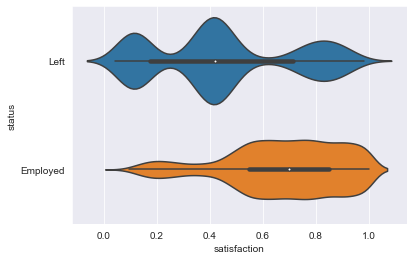

In [16]:
# violinplot of job satisfaction against employment status
sns.violinplot(y='status', x='satisfaction', data=df)
plt.show()

As expected, a large number of people who remained employed are highly satisfied with their jobs, and most who left rank low in job satisfaction. However, note that highly-satisfied people also leave!

#### To get a clearer picture, we use bivariate segmentations, where we compare 2 numeric features against one categorical feature.

To do so, we make use of seaborn's *.lmplot()* function. 

We can color each point based on its 'status'. To do so, we use the *hue=* argument. 

We are also setting *scatter_kws={'alpha: 0.1'}* to make the points partially transparent. 

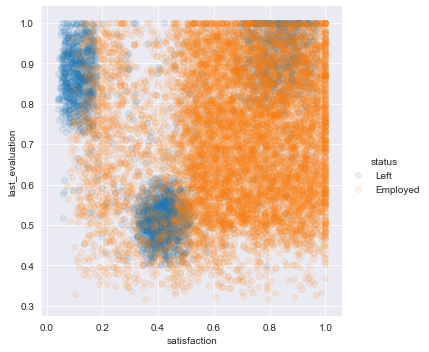

In [17]:
# scatterplot of satisfaction vs last_evaluation
sns.lmplot(x='satisfaction',
          y='last_evaluation', 
          hue='status',
          data=df,
          fit_reg=False,
          scatter_kws={'alpha': 0.1})
plt.show()

Sometimes, the chart can get too cluttered. Instead, it might be helpful to use a scatterplot for those who have 'Left'.

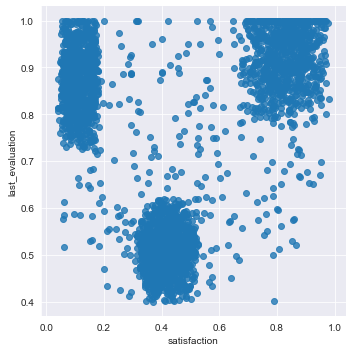

In [18]:
sns.lmplot(x='satisfaction',
          y='last_evaluation',
          data=df[df.status=='Left'],
          fit_reg=False)
plt.show()

#### Indeed, there are clusters being formed for those who have left. 

Make a mental note:
1. "Overachievers" : last_evaluation > 0.8 and satisfaction > 0.7
2. "Underperformers": last_evaluation < 0.7
3. "Overqualified" : satisfaction < 0.2 and last_evaluation > 0.7 

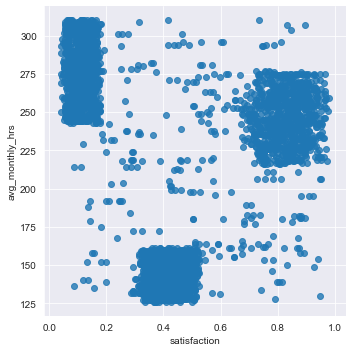

In [22]:
sns.lmplot(y='avg_monthly_hrs',
          x='satisfaction',
          data=df[df.status == 'Left'],
          fit_reg=False)
plt.show()


## III. Ad-Hoc Data Cleaning

Briefly looking at the data above we can surmise that *'recently_promoted'* and *'filed_complaint'* are **indicator** features.

In [23]:
print(df.filed_complaint.unique())

[nan  1.]


In [24]:
print(df.recently_promoted.unique())

[nan  1.]


In [25]:
# fill all NaNs with 0s
df.filed_complaint.fillna(0, inplace=True)
df.recently_promoted.fillna(0, inplace=True)

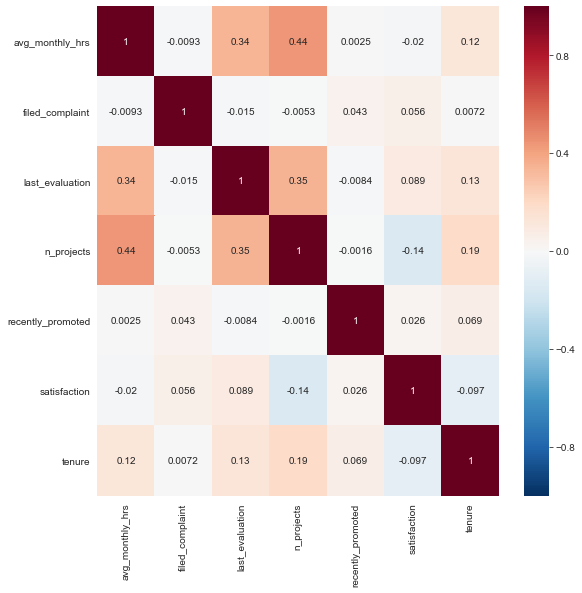

In [26]:
corr = df.corr()

plt.figure(figsize=(9, 9))
sns.heatmap(corr,
           annot=True,
           cmap='RdBu_r',
           vmin=-1,
           vmax=1)
plt.show()

## IV. Ad-Hoc Feature Engineering

In [27]:
print(df.salary.unique())

['low' 'medium' 'high']


**When a categorical feature's classes have a natural sequence such as low-->medium-->high, this feature is referred to as an ordinal feature**

For such features, we can choose to **encode them using sequential numbers**.

For multi-class categorical features (eg 'department'), we perform *one-hot-encoding*

In [28]:
df['salary_numeric'] = df.salary.replace({'low': 1,
                                         'medium': 2,
                                         'high': 3})

In [29]:
df['salary_numeric'].head()

0    1
1    1
2    2
3    1
4    1
Name: salary_numeric, dtype: int64

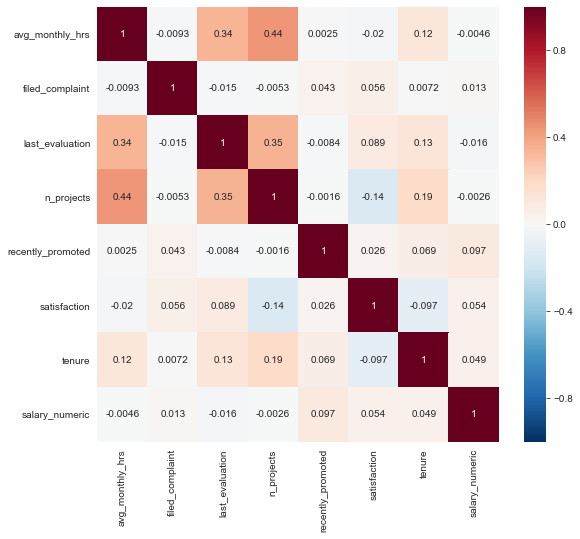

In [30]:
corr = df.corr()

plt.figure(figsize=(9,8))
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 1.1 - Basic Information</span>

Let's begin by displaying the dataset's basic information.

#### A.) First, display the <span style="color:royalblue">dimensions</span> (a.k.a. shape) of the dataset.
* How many **observations** do we have?
* How many **features** do we have?
* Is one of those features technically a **target variable**?
* **Note:** These dimensions should now include the ad-hoc changes we made during the Coding Section!

In [31]:
df.shape

(14249, 11)

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(14249, 11)
</pre>

#### B.) Next, display the <span style="color:royalblue">datatypes</span> of the features.
* Which are the **numeric** features?
* Which are the **categorical** features?

In [32]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
salary_numeric         int64
dtype: object

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
salary_numeric         int64
dtype: object
</pre>

Do any of the data types look suspicious/possibly incorrect (i.e. numeric features that should be categorical or vice-versa)? If so, just keep it in the back of your mind. If a **data dictionary** was provided, that's a great resource to doublecheck. Also, it's fine if you're unsure about some columns, as we'll continue to explore them.

#### C.) Next, display the first 10 <span style="color:royalblue">example observations</span> from the dataset.
* Remember, the purpose is not to perform rigorous analysis. Instead, it's to get a **qualitative "feel"** for the dataset.
* Do the columns make sense?
* Do the values in those columns make sense?
* Is **missing data** going to be a big problem based on an eyeball test?
* What types of classes are there for the **categorical features**?

In [33]:
df.head(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0,1
1,232,support,0.0,NaN,3,0.0,low,0.834544,Employed,2.0,1
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0,2
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0,1
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0,1
5,140,sales,0.0,0.589097,4,0.0,medium,0.660020,Employed,4.0,2
6,121,sales,1.0,0.625399,3,0.0,low,0.835571,Employed,3.0,1
7,150,engineering,0.0,0.644586,4,0.0,low,0.796683,Employed,3.0,1
8,215,engineering,1.0,0.524114,3,0.0,medium,0.715005,Employed,7.0,2
9,269,support,0.0,0.909364,5,0.0,medium,0.994037,Employed,2.0,2


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>avg_monthly_hrs</th>
      <th>department</th>
      <th>filed_complaint</th>
      <th>last_evaluation</th>
      <th>n_projects</th>
      <th>recently_promoted</th>
      <th>salary</th>
      <th>satisfaction</th>
      <th>status</th>
      <th>tenure</th>
      <th>salary_numeric</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>221</td>
      <td>engineering</td>
      <td>0.0</td>
      <td>0.932868</td>
      <td>4</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.829896</td>
      <td>Left</td>
      <td>5.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>232</td>
      <td>support</td>
      <td>0.0</td>
      <td>NaN</td>
      <td>3</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.834544</td>
      <td>Employed</td>
      <td>2.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>184</td>
      <td>sales</td>
      <td>0.0</td>
      <td>0.788830</td>
      <td>3</td>
      <td>0.0</td>
      <td>medium</td>
      <td>0.834988</td>
      <td>Employed</td>
      <td>3.0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>206</td>
      <td>sales</td>
      <td>0.0</td>
      <td>0.575688</td>
      <td>4</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.424764</td>
      <td>Employed</td>
      <td>2.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>249</td>
      <td>sales</td>
      <td>0.0</td>
      <td>0.845217</td>
      <td>3</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.779043</td>
      <td>Employed</td>
      <td>3.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>140</td>
      <td>sales</td>
      <td>0.0</td>
      <td>0.589097</td>
      <td>4</td>
      <td>0.0</td>
      <td>medium</td>
      <td>0.660020</td>
      <td>Employed</td>
      <td>4.0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>6</th>
      <td>121</td>
      <td>sales</td>
      <td>1.0</td>
      <td>0.625399</td>
      <td>3</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.835571</td>
      <td>Employed</td>
      <td>3.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>7</th>
      <td>150</td>
      <td>engineering</td>
      <td>0.0</td>
      <td>0.644586</td>
      <td>4</td>
      <td>0.0</td>
      <td>low</td>
      <td>0.796683</td>
      <td>Employed</td>
      <td>3.0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>215</td>
      <td>engineering</td>
      <td>1.0</td>
      <td>0.524114</td>
      <td>3</td>
      <td>0.0</td>
      <td>medium</td>
      <td>0.715005</td>
      <td>Employed</td>
      <td>7.0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>9</th>
      <td>269</td>
      <td>support</td>
      <td>0.0</td>
      <td>0.909364</td>
      <td>5</td>
      <td>0.0</td>
      <td>medium</td>
      <td>0.994037</td>
      <td>Employed</td>
      <td>2.0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

#### D.) Finally, display the last 10 rows of data to check for any signs of <span style="color:royalblue">corrupted data</span>.
* Corrupted data will usually appear as a bunch of gibberish. It will be obvious.
* Most of the time, you won't have corrupted data... but this is still a quick and easy check.
* Does anything look out of the ordinary? Spend a couple minutes looking over the data to get familiar with it. Once you feel comfortable, let's move on to plotting distributions.

In [34]:
df.tail(10)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,salary_numeric
14239,242,finance,0.0,0.781112,6,0.0,low,0.669866,Left,5.0,1
14240,131,engineering,0.0,0.531197,2,0.0,low,0.341842,Left,3.0,1
14241,235,IT,0.0,0.683498,3,0.0,medium,0.923564,Employed,3.0,2
14242,157,support,0.0,0.707167,5,0.0,low,0.834708,Employed,4.0,1
14243,272,engineering,0.0,0.815504,4,0.0,low,0.693387,Employed,2.0,1
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0,1
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0,1
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0,2
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0,2
14248,159,NaN,0.0,0.578742,3,0.0,medium,0.808850,Employed,3.0,2


## <span style="color:RoyalBlue">Exercise 1.2 - Distributions of Numeric Features</span>

One of the most enlightening data exploration tasks is plotting the distributions of your features.

#### A.) First, plot the Pandas <span style="color:royalblue">histogram grid</span> for all the numeric features.

Feel free to mess around with the settings and formatting, but here are the settings we used for reference:
* We made the figure size 10x10
* We also rotated x-labels by -45 degrees

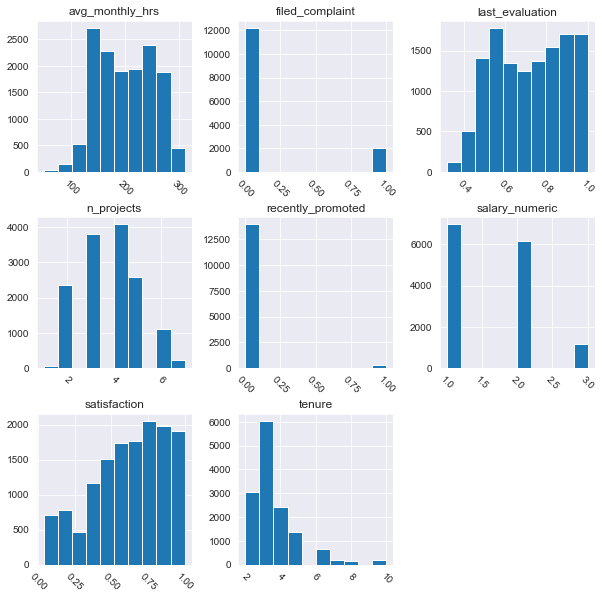

In [36]:
df.hist(figsize=(10,10),
       xrot=-45)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="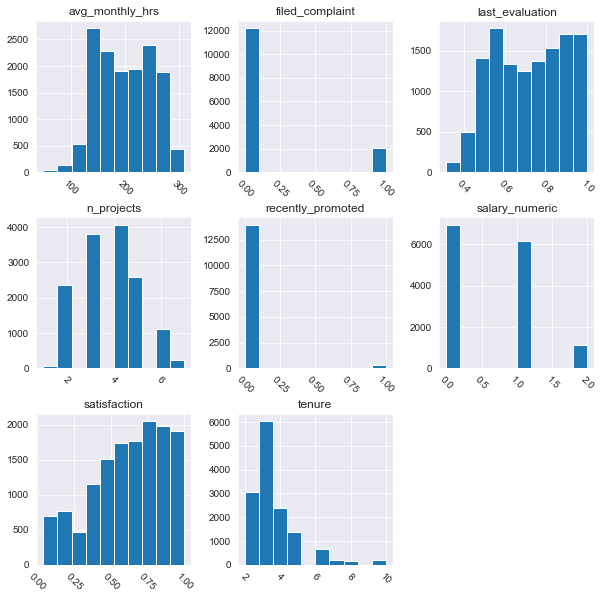&#10;">

#### B.) Consider these questions:
* Are there any distributions that don't make sense?
* Does it look like there are potential **outliers** that don't make sense?
* Are there any **boundaries** that don't make sense?

#### C.) Next, display formal <span style="color:royalblue">summary statistics</span> for the numeric features.

In [37]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
count,14249.000000,14249.000000,12717.000000,14249.000000,14249.000000,14068.000000,14068.000000,14249.000000
mean,199.795775,0.144431,0.718477,3.773809,0.021054,0.621295,3.497228,1.592884
std,50.998714,0.351539,0.173062,1.253126,0.143570,0.250469,1.460917,0.634788
min,49.000000,0.000000,0.316175,1.000000,0.000000,0.040058,2.000000,1.000000
25%,155.000000,0.000000,0.563866,3.000000,0.000000,0.450390,3.000000,1.000000
50%,199.000000,0.000000,0.724939,4.000000,0.000000,0.652527,3.000000,2.000000
75%,245.000000,0.000000,0.871358,5.000000,0.000000,0.824951,4.000000,2.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000,3.000000


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>avg_monthly_hrs</th>
      <th>filed_complaint</th>
      <th>last_evaluation</th>
      <th>n_projects</th>
      <th>recently_promoted</th>
      <th>satisfaction</th>
      <th>tenure</th>
      <th>salary_numeric</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>14249.000000</td>
      <td>14249.000000</td>
      <td>12717.000000</td>
      <td>14249.000000</td>
      <td>14249.000000</td>
      <td>14068.000000</td>
      <td>14068.000000</td>
      <td>14249.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>199.795775</td>
      <td>0.144431</td>
      <td>0.718477</td>
      <td>3.773809</td>
      <td>0.021054</td>
      <td>0.621295</td>
      <td>3.497228</td>
      <td>0.592884</td>
    </tr>
    <tr>
      <th>std</th>
      <td>50.998714</td>
      <td>0.351539</td>
      <td>0.173062</td>
      <td>1.253126</td>
      <td>0.143570</td>
      <td>0.250469</td>
      <td>1.460917</td>
      <td>0.634788</td>
    </tr>
    <tr>
      <th>min</th>
      <td>49.000000</td>
      <td>0.000000</td>
      <td>0.316175</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>0.040058</td>
      <td>2.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>155.000000</td>
      <td>0.000000</td>
      <td>0.563866</td>
      <td>3.000000</td>
      <td>0.000000</td>
      <td>0.450390</td>
      <td>3.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>199.000000</td>
      <td>0.000000</td>
      <td>0.724939</td>
      <td>4.000000</td>
      <td>0.000000</td>
      <td>0.652527</td>
      <td>3.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>245.000000</td>
      <td>0.000000</td>
      <td>0.871358</td>
      <td>5.000000</td>
      <td>0.000000</td>
      <td>0.824951</td>
      <td>4.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>310.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>7.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>10.000000</td>
      <td>2.000000</td>
    </tr>
  </tbody>
</table>

#### D.) Finally, consider these questions:
* Are any of the **count** values less than the total number of observations? What does this imply?
* Do the **min** values for each column make sense?
* Do the **max** values for each column make sense?

## <span style="color:RoyalBlue">Exercise 1.3 - Distributions of Categorical Features</span>

Next, let's take a look at the distributions of our categorical features.

#### A.) First, display the <span style="color:royalblue">summary statistics</span> for categorical features in the dataset.

In [39]:
df.select_dtypes(include=['object']).describe()

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>department</th>
      <th>salary</th>
      <th>status</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>13540</td>
      <td>14249</td>
      <td>14249</td>
    </tr>
    <tr>
      <th>unique</th>
      <td>12</td>
      <td>3</td>
      <td>2</td>
    </tr>
    <tr>
      <th>top</th>
      <td>sales</td>
      <td>low</td>
      <td>Employed</td>
    </tr>
    <tr>
      <th>freq</th>
      <td>3923</td>
      <td>6952</td>
      <td>10857</td>
    </tr>
  </tbody>
</table>

#### B.) For each categorical feature, consider:
* How many **unique** classes does it have?
* What is the most frequent class?
* How many observations belong to the most frequent class?
* Does it have any missing values?

You should be able to answer each of those questions from the summary statistics table!

Next, let's visualize this information, just as we did for the numerical features. Just as we did in the previous project, we'll use Seaborn's <code style="color:steelblue">sns.countplot()</code> function, which is the same as a **bar plot**.

#### C.) Using a loop, display <span style="color:royalblue">bar plots</span> for each of the categorical features.

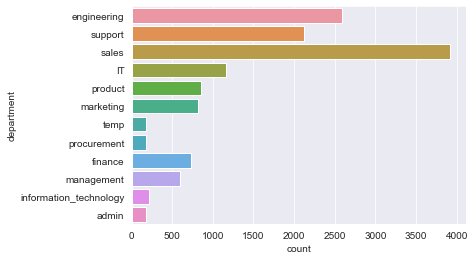

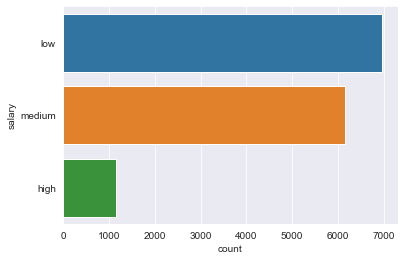

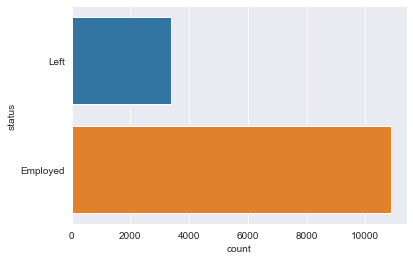

In [41]:
for cat in df.select_dtypes(include=['object']):
    sns.countplot(y = cat, data=df)
    plt.show()

#### D.) Finally, consider:
* Are there any classes that might be **sparse**?
* Are there any classes that shouldn't be in the dataset based on our **project scope**? (Hint: there's 1... can you find it?)
* Are there any **mislabeled classes** (i.e. two classes that are essentially the same)?
* Do the distributions seem intuitive?

Again, we'll make any changes or fixes in the next module... For now, it's just about **"getting to know"** the data!

## <span style="color:RoyalBlue">Exercise 1.4 - Segmentations</span>

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

For classification tasks, **your target variable is categorical**. Therefore, we recommend segmenting key numeric features by the target variable. (In the previous project, we recommended segmenting the target variable by key categorical features.)

In the Coding Section, we already segmented <code style="color:steelblue">'satisfaction'</code> by <code style="color:steelblue">'status'</code>.

#### A.) Now, let's first display a <span style="color:royalblue">violin plot</span> with <code style="color:steelblue">'status'</code> on the y-axis and <code style="color:steelblue">'avg_monthly_hrs'</code> on the x-axis.
* What is this plot telling us?

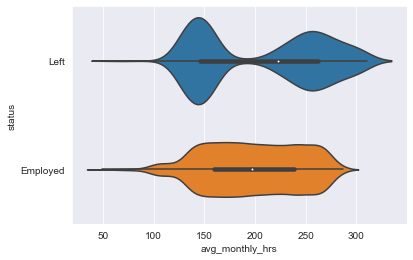

In [43]:
# categorical features on the y-axis
sns.violinplot(x='avg_monthly_hrs', y='status', data=df)
plt.show()

This tells us that people who left are either **bored** or **overworked**.

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="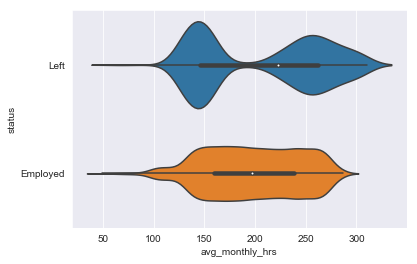&#10;">

#### B.) Next, display a violin plot that segments <code style="color:steelblue">'last_evaluation'</code> by <code style="color:steelblue">'status'</code>.
* What is this plot telling us?

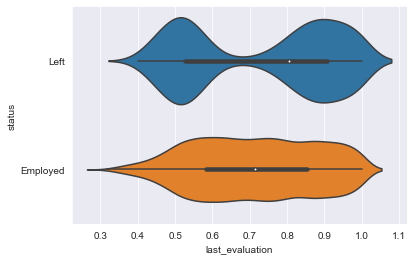

In [44]:
sns.violinplot(x='last_evaluation', y='status', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="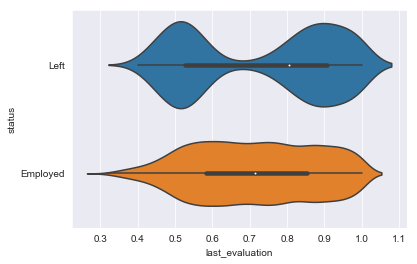&#10;">

Now, as we did in the previous project, let's use a **groupby** to show detailed statistics by class.

#### C.) <span style="color:royalblue">Group by</span> <code style="color:steelblue">'status'</code> and calculate the average value of each feature within each class.

In [45]:
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
status,,,,,,,,
Employed,197.700286,0.175187,0.714479,3.755273,0.025974,0.675979,3.380245,1.648061
Left,206.502948,0.045991,0.730706,3.833137,0.005307,0.447500,3.869023,1.416274


<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>avg_monthly_hrs</th>
      <th>filed_complaint</th>
      <th>last_evaluation</th>
      <th>n_projects</th>
      <th>recently_promoted</th>
      <th>satisfaction</th>
      <th>tenure</th>
      <th>salary_numeric</th>
    </tr>
    <tr>
      <th>status</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Employed</th>
      <td>197.700286</td>
      <td>0.175187</td>
      <td>0.714479</td>
      <td>3.755273</td>
      <td>0.025974</td>
      <td>0.675979</td>
      <td>3.380245</td>
      <td>0.648061</td>
    </tr>
    <tr>
      <th>Left</th>
      <td>206.502948</td>
      <td>0.045991</td>
      <td>0.730706</td>
      <td>3.833137</td>
      <td>0.005307</td>
      <td>0.447500</td>
      <td>3.869023</td>
      <td>0.416274</td>
    </tr>
  </tbody>
</table>

Now you can compare all of the numeric features between employees who've left and those who are still employed.

#### D.) Finally, answer these questions.
* Did leavers work more hours per month?
* On average, were leavers longer tenured?
* On average, did leavers have lower evaluations than those who are still employed?
* What percent of leavers filed a complaint? How about those who are still employed?
* What percent of leavers were recently promoted? How about those who are still employed?

## <span style="color:RoyalBlue">Exercise 1.5 - Ad Hoc Alterations</span>

Next, let's say you wanted to see which department had the employees who worked the most number of hours per month. Well, before we aggregate by department and calculate averages, we should first correct 'IT' and 'information_technology', which are separate classes but they actually are the same department.

#### A.) First, replace all instances of the <code>'information_technology'</code> class with <code>'IT'</code> instead.

In [46]:
df.department.replace('information_technology', 'IT', inplace=True)

#### B.) Next, just so it doesn't clutter our outputs, let's remove observations with the <code>'temp'</code> class for department.

In [47]:
df = df[df['department'] != 'temp']

#### C.) As a sanity check, display the bar plot for department distributions again.

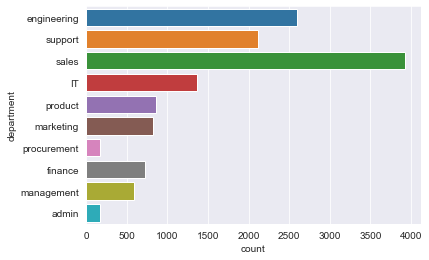

In [49]:
sns.countplot(y='department', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="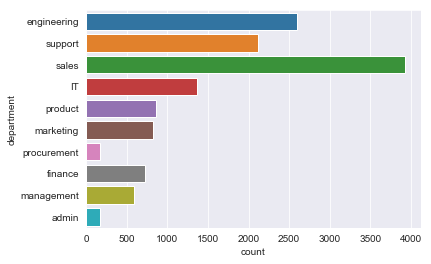&#10;">

#### D.) Finally, determine which department had the employees who worked the most monthly hours on average.
* **Tip:** Just as in many of the exercises, there are multiple valid ways to arrive at this answer.

In [50]:
df.groupby('department').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_numeric
department,,,,,,,,
IT,202.174453,0.140876,0.720017,3.810219,0.005109,0.628079,3.456204,1.572263
admin,201.272727,0.096591,0.726282,3.897727,0.028409,0.611450,3.369318,1.596591
engineering,202.469522,0.138889,0.722332,3.872299,0.010031,0.617907,3.402392,1.564815
finance,201.175824,0.119505,0.723880,3.815934,0.019231,0.586787,3.543956,1.641484
management,201.025210,0.173109,0.729714,3.857143,0.114286,0.630428,4.294118,2.057143
marketing,199.664225,0.159951,0.715018,3.687424,0.048840,0.629122,3.567766,1.620269
procurement,199.482759,0.183908,0.699205,3.885057,0.057471,0.627930,3.264368,1.557471
product,199.991860,0.151163,0.719616,3.817442,0.000000,0.628774,3.487209,1.577907
sales,200.842467,0.141728,0.711254,3.772878,0.024726,0.623075,3.527148,1.556207


In [53]:
type(df.groupby('department').mean()['avg_monthly_hrs'])

pandas.core.series.Series

In [54]:
# .idxmax() is the equivalent of .argmax() used in numpy arrays
df.groupby('department').mean()['avg_monthly_hrs'].idxmax()

'engineering'

## <span style="color:RoyalBlue">Exercise 1.6 - Advanced Segmentations</span>

In the Coding Section, we saw a bivariate segmentation for <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code>. Now, let's take a quick look at segmentations of other combinations of features.

#### A.) Plot a bivariate segmentation for <code style="color:steelblue">'last_evaluation'</code> and <code style="color:steelblue">'avg_monthly_hrs'</code> segmented by <code style="color:steelblue">'status'</code>.
* What is this chart telling us?

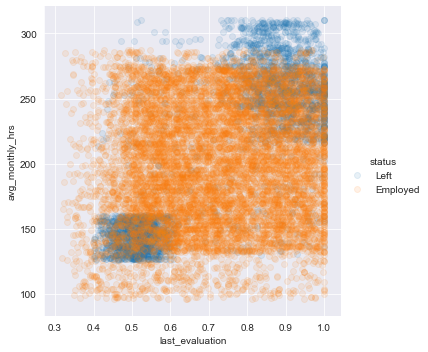

In [57]:
sns.lmplot(x='last_evaluation',
          y='avg_monthly_hrs',
          hue='status',
          data=df,
          scatter_kws={'alpha':0.1},
          fit_reg=False)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="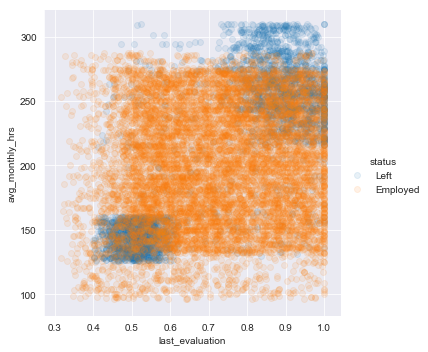&#10;">

#### B.) Plot another scatterplot of <code style="color:steelblue">'last_evaluation'</code> and <code style="color:steelblue">'avg_monthly_hrs'</code>, but only for employees who have <code style="color:crimson">'Left'</code>.
* Note that we don't need the <code style="color:steelblue">hue=</code> argument.
* Instead, we can filter the <code style="color:steelblue">data=df</code> argument.

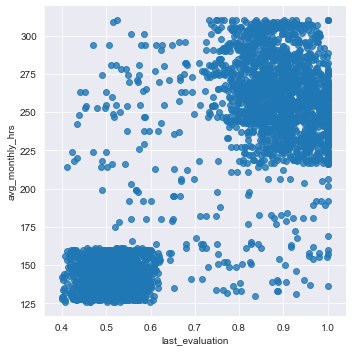

In [59]:
sns.lmplot(x='last_evaluation',
          y='avg_monthly_hrs',
          data=df[df.status=='Left'],
          fit_reg=False)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="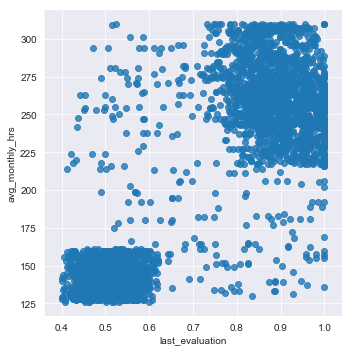&#10;">

#### C.) Does it look like there are clusters of people who left based on these two features? Could we create any new features during feature engineering based on this information?
* Again, not all of the features we engineer will need to be winners. As long as we have good reasoning to try them, we can put them in and leave it up to our model training process to perform feature selection.

Before powering on to the next module, we recommend going back and reviewing the charts you made. This time, since you've already created them, you can move through more quickly and really start to understand the **story** behind the data.

As a reminder, here are a few things you did in this module:
* You explored basic information about your dataset.
* You plotted distributions of numeric and categorical features.
* You segmented your dataset by <code style="color:steelblue">'status'</code>.
* And you dove into some advanced, bivariate segmentations.

As you work through the next module, <span style="color:royalblue">ABT Construction</span>, we recommend keeping this workbook open in a separate tab. It might be helpful to have your charts in front of you as you clean the data and engineer features.